In [237]:
from scipy import ndimage
import imageio
from numpy import*
from matplotlib.pyplot import*
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Foto original

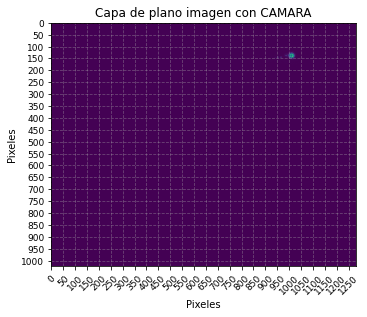

In [280]:
image =imageio.imread('ImgCristal_306.tif') 

im0=image[:,:,0] 
fig =figure(figsize=(12,12))
subplot(221)
imshow(im0)
xlabel('Pixeles')
ylabel('Pixeles')
yticks(arange(0, im0.shape[0], 50),size=9)
xticks(arange(0, im0.shape[1], 50), rotation=45,size=9)
title('Capa de plano imagen con CAMARA')
grid(linestyle='--',alpha=0.4)
show()

# Zoom de la imagen

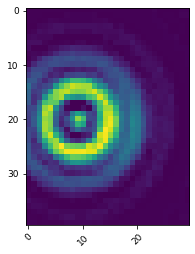

In [293]:
x1 = 120#137#int(input("Limite superior en el eje Y en pixeles: "))
x2 = 160#144#int(input("Limite inferior en el eje Y en pixeles: "))
y1 = 1000#1006#int(input("Limite izquierdo en el eje X en pixeles: "))
y2 = 1030#1012#int(input("Limite derecho en el eje X pixeles: "))
zoom = im0[x1:x2,y1:y2] # Primer rango es el eje 'Y' y el segundo el 'X'

imshow(zoom)
yticks(arange(0, zoom.shape[0], 10),size=9)
xticks(arange(0, zoom.shape[1], 10), rotation=45,size=9)
show()

# Indentificar posición donde están los peak máximos

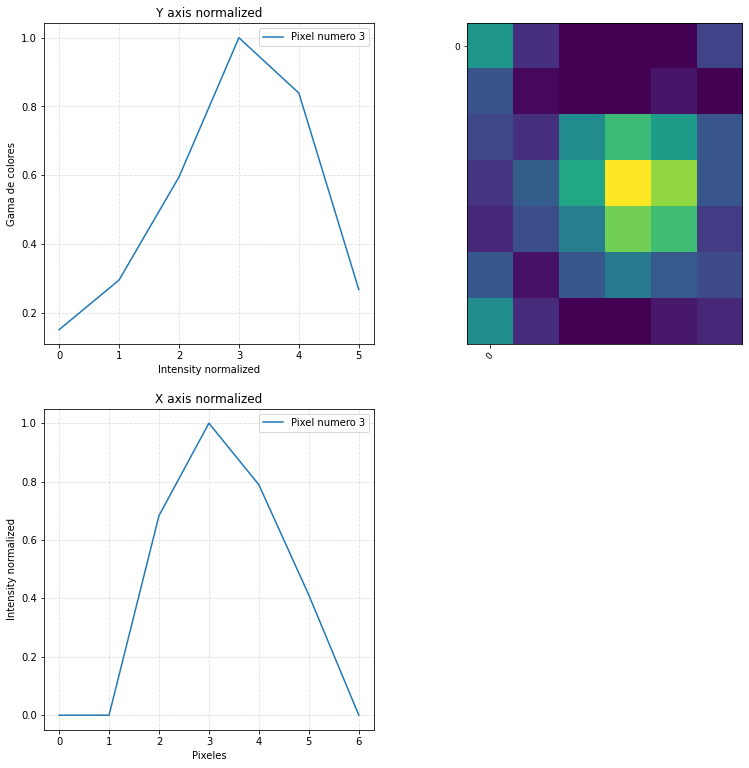

In [282]:
a=where(zoom == zoom.max())                                                     #Array with two columns, the first is X axis and second is Y axis 
option=2
if option==1:
    X=zoom[:,a[1][1]]                                                               # one of the array that contains a maximum
    Perfilnormx=X/max(X)                                                            #Cross section but is normalized
    pixelesx=range(len(X))

    Y= zoom[a[0][1],:]                                                              # one of the array that contains a maximum
    Perfilnormy=Y/max(Y)                                                            #Cross section but is normalized
    pixelesy=range(len(Y))

    fig =figure(1,figsize=(13,13))
    ############################CROSS SECTION IN X AXIS##############################
    subplot(221)        
    plot(pixelesy,Perfilnormy,label='Pixel numero '+str(a[0][1]))
    legend(loc=0)
    xlabel('Intensity normalized')
    ylabel('Gama de colores')
    title('X axis normalized')
    grid(linestyle='--',alpha=0.4)
    ############################ORIGINAL IMAGE########################################
    subplot(222)  
    imshow(zoom)
    yticks(arange(0, zoom.shape[0], 10),size=9)
    xticks(arange(0, zoom.shape[1], 10), rotation=45,size=9)
    ############################CROSS SECTION IN Y AXIS##############################
    subplot(223)         
    plot(pixelesx,Perfilnormx,label='Pixel numero '+str(a[1][1]))
    legend(loc=0)
    xlabel('Pixeles')
    ylabel('Intensity normalized')
    title('Y axis normalized')
    grid(linestyle='--',alpha=0.4)
    show()
elif option==2:
    X=zoom[:,a[1][0]]                                                               # one of the array that contains a maximum
    Perfilnormx=X/max(X)                                                            #Cross section but is normalized
    pixelesx=range(len(X))
    Y= zoom[a[0][0],:]                                                              # one of the array that contains a maximum
    Perfilnormy=Y/max(Y)                                                            #Cross section but is normalized
    pixelesy=range(len(Y))

    fig =figure(1,figsize=(13,13))
    ############################CROSS SECTION IN X AXIS##############################
    subplot(221)        
    plot(pixelesy,Perfilnormy,label='Pixel numero '+str(a[0][0]))
    legend(loc=0)
    xlabel('Intensity normalized')
    ylabel('Gama de colores')
    title('Y axis normalized')
    grid(linestyle='--',alpha=0.4)
    ############################ORIGINAL IMAGE########################################
    subplot(222)  
    imshow(zoom)
    yticks(arange(0, zoom.shape[0], 10),size=9)
    xticks(arange(0, zoom.shape[1], 10), rotation=45,size=9)
    ############################CROSS SECTION IN Y AXIS##############################
    subplot(223)         
    plot(pixelesx,Perfilnormx,label='Pixel numero '+str(a[1][0]))
    legend(loc=0)
    xlabel('Pixeles')
    ylabel('Intensity normalized')
    title('X axis normalized')
    grid(linestyle='--',alpha=0.4)
    show()

# Ajuste a perfil seleccionado

ax opt.= 202.98| ax input:180
bx opt.= 3.79| bx input:3
cx opt.= 3.01| cx input:7
dx opt.= -18.95| dx input:27
ay opt.= 159.45| ay input:180
by opt.= 3.82| by input:3
cy opt.= 2.44| cy input:6
dy opt.= 27.29| dy input:27


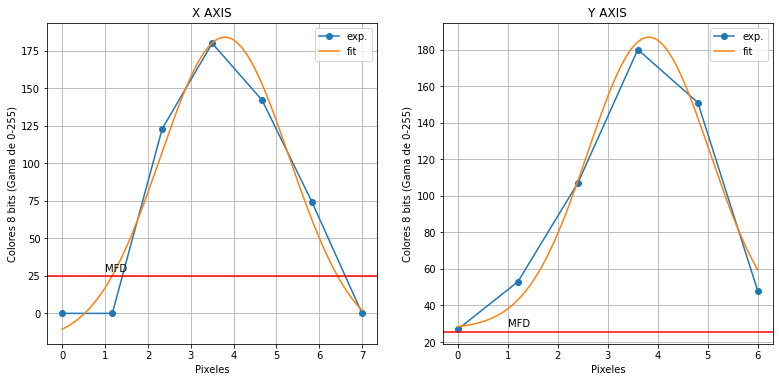

In [283]:
def func1(x,a,b,c,d):
    '''
    inputs
        c(float): es el waist, un radio
        
    '''
    return a*(np.exp(-2*((x-b)**2)/c**2)) +d

#######################FIT X AXIS##################################

# Ingrese el ancho en X estimado de sus datos para realizar el ajuste en pixeles:
bandx= 7#std(X,ddof=1)
x= linspace(0,len(X),len(X))

def eps1(p,x):
    return func1(x,p[0],p[1],p[2],p[3])-X
parametros1=[max(X),int(mean(a[0])),bandx,min(X)]   
   
(anchox,bx,cx,dx),_=leastsq(eps1,parametros1,args=(x))

print('ax opt.= '+str(round(anchox,2))+'| ax input:'+str(max(X))        )
print('bx opt.= '+str(round(bx,2))+'| bx input:'+str(int(mean(a[1])))   )
print('cx opt.= '+str(round(cx,2))+'| cx input:'+str(round(bandx))      )
print('dx opt.= '+str(round(dx,2))+'| dx input:'+str(min(Y))            )

#######################FIT Y AXIS#################################

#Ancho en Y estimado para realizar el ajuste en pixeles:
bandy=6# std(Y,ddof=1)
y= linspace(0,len(Y),len(Y))
#Input for seeds values , a=peak, b=where is center,c=bandwidth, d= displacement in Y
def eps0(p,x):
    return func1(x,p[0],p[1],p[2],p[3])-Y
parametros0=[max(Y),int(mean(a[1])),bandy,min(Y)]   
(anchoy,by,cy,dy),_=leastsq(eps0,parametros0,args=(y))

print('ay opt.= '+str(round(anchoy,2))+'| ay input:'+str(max(Y))      )
print('by opt.= '+str(round(by,2))+'| by input:'+str(int(mean(a[0]))) ) 
print('cy opt.= '+str(round(cy,2))+'| cy input:'+str(round(bandy))    )
print('dy opt.= '+str(round(dy,2))+'| dy input:'+str(min(Y))          )

#####################################################################
##################################PLOT FITS##########################
#####################################################################
fig =figure(1,figsize=(13,13))
subplot(221) 
plot(x,X,'o-',label='exp.')
xx2=linspace(0,len(X),2000)
plot(xx2,func1(xx2,anchox,bx,cx,dx),label='fit')
grid()
xlabel('Pixeles')
ylabel('Colores 8 bits (Gama de 0-255)')
title('X AXIS')
text(1, max(func1(xx2,anchoy,by,cy,dy))*(1/e**2)+3, 'MFD', fontdict=None)
axhline(y = max(func1(xx2,anchox,bx,cx,dx))*(1/e**2), color = 'r', linestyle = '-')
legend(loc=0)

subplot(222)
plot(y,Y,'o-',label='exp.')
xx1=linspace(0,len(Y),2000)
plot(xx1,func1(xx1,anchoy,by,cy,dy),label='fit')
grid()
xlabel('Pixeles')
ylabel('Colores 8 bits (Gama de 0-255)')
text(1, max(func1(xx1,anchoy,by,cy,dy))*(1/e**2)+3, 'MFD', fontdict=None)
axhline(y = max(func1(xx1,anchoy,by,cy,dy))*(1/e**2), color = 'r', linestyle = '-')
title('Y AXIS')
legend(loc=0)
show()

# Si este bloque entrega el siguiente error:
# "RuntimeWarning: Number of calls to function has reached maxfev = 1000."
# hay que cambiar el valor de la variable bandx (tercera línea)

In [284]:
############################
## R-SQUARE ################
######################## X AXIS#################################
xx= linspace(0,len(X),len(X))               #Matrix with less point so you can do the direct subtraction.
rsquarex = r2_score(X,func1(xx,anchox,bx,cx,dx))
print('El factor R-square en el eje X del ajuste es: '+str(round(rsquarex,4)))

######################## Y AXIS#################################
yy= linspace(0,len(Y),len(Y))               #Matrix with less point so you can do the direct subtraction.
rsquarey =r2_score(Y, func1(yy,anchoy,by,cy,dy))
print('El factor R-square en el eje Y del ajuste es: '+str(round(rsquarey,4)))

El factor R-square en el eje X del ajuste es: 0.9643
El factor R-square en el eje Y del ajuste es: 0.9833


### Cálculo MFD
The mode field diameter desscribes the width of gaussian intensity profile inside the single mode fiber. Single mode fibers have one guided mode, and wave optics analysis reveals the mode to be described by a Bessel function. The amplitude profiles of Gaussian and Bessel functions closely resemble one another.
The MFD, which is constant along the fiber's length, is the width measured at an intensity equal to the product of $e^{-2}$ and the peak intensity. The MFD encloses $\approx 86\%$ of the beam's power.


In [285]:
funci1= func1(xx2,anchox,bx,cx,dx)
mfdx=max(funci1)*(1/e**2)               #
print("The mode field diameter is in y="+ str(mfdx))


The mode field diameter is in y=24.905850249734637


In [286]:
tolerance=0.6
valorindex=[]
MFD_fibra= 5.0 # MFD de la fibra a utilizar
for i in range(0,len(funci1)):
    if mfdx-tolerance<funci1[i]<mfdx+tolerance:
        valorindex.append(funci1[i])
firstp, lastp=where(funci1==valorindex[0]), where(funci1==valorindex[-1])                      
mfdF=xx2[lastp[0]]-xx2[firstp[0]]                                                        
print('El primer pixel es '+str(firstp[0])+ ' y el segundo pixel es el '+str(lastp[0]))
print(str(round(mfdF[0]*3.7,2))+' micrometros')
Mag= round((mfdF[0]*3.7)/MFD_fibra,2)  # Cambiar                                                                        # 6.6 es el MFD@776 de la SMF 28
print('La magnificación es: '+str(Mag)+'x')

El primer pixel es [329] y el segundo pixel es el [1838]
19.55 micrometros
La magnificación es: 3.91x
